# Experiments on synthetic data

Code to obtain the results in Section 4 of NeurIPS 2021 Paper6977 submission,
for the proposed Conformal RNN model. This also briefly reviews the code to run the
BJRNN baseline.

In [1]:
%load_ext autoreload

%autoreload 2

Required imports

In [2]:
import numpy as np
import pickle
import torch

from matplotlib import pyplot as plt
%matplotlib inline

from utils.train_synthetic import run_synthetic_experiments

## Time-dependent noise profile (Figure 3, Table 2)

Training procedure for CoRNN/MQ-RNN/DP-RNN baselines (for 5 different seeds):

In [3]:
all_time_dependent_results = []
for seed in range(5):
    time_dependent_results = run_synthetic_experiments(baselines=['QRNN', 'DPRNN', 'CPRNN'], 
                              retrain=True,
                              generate_datasets=True,
                              experiment='time-dependent',
                              save_model=True,
                              save_results=True,
                              rnn_mode='LSTM',
                              seed=seed)
    all_time_dependent_results.append(time_dependent_results)
    
with open('saved_results/all_time_dependent_results.pkl', 'wb') as f:
    pickle.dump(all_time_dependent_results, f, protocol=pickle.HIGHEST_PROTOCOL)

Training QRNN
Training dataset 0
Epoch:  0 | train loss: 0.6460
Epoch:  1 | train loss: 0.6769
Epoch:  2 | train loss: 0.6440
Epoch:  3 | train loss: 0.6474
Epoch:  4 | train loss: 0.6784
Epoch:  5 | train loss: 0.6588
Epoch:  6 | train loss: 0.6764
Epoch:  7 | train loss: 0.6558
Epoch:  8 | train loss: 0.6388
Epoch:  9 | train loss: 0.6124
Training dataset 1
Epoch:  0 | train loss: 0.8844
Epoch:  1 | train loss: 0.8313
Epoch:  2 | train loss: 0.7721
Epoch:  3 | train loss: 0.7430
Epoch:  4 | train loss: 0.7563
Epoch:  5 | train loss: 0.8019
Epoch:  6 | train loss: 0.8050
Epoch:  7 | train loss: 0.7919
Epoch:  8 | train loss: 0.8091
Epoch:  9 | train loss: 0.8276
Training dataset 2
Epoch:  0 | train loss: 0.9786
Epoch:  1 | train loss: 1.0138
Epoch:  2 | train loss: 0.9228
Epoch:  3 | train loss: 0.9703
Epoch:  4 | train loss: 0.9948
Epoch:  5 | train loss: 1.0279
Epoch:  6 | train loss: 1.0004
Epoch:  7 | train loss: 0.9706
Epoch:  8 | train loss: 0.9518
Epoch:  9 | train loss: 1.0582

In [4]:
all_static_results = []
for seed in range(5):
    static_results = run_synthetic_experiments(baselines=['QRNN', 'DPRNN', 'CPRNN'], 
                              retrain=True,
                              generate_datasets=True,
                              experiment='static',
                              save_model=True,
                              save_results=True,
                              rnn_mode='LSTM',
                              seed=seed)
    all_static_results.append(static_results)
    
with open('saved_results/all_static_results.pkl', 'wb') as f:
    pickle.dump(all_static_results, f, protocol=pickle.HIGHEST_PROTOCOL)

Training QRNN
Training dataset 0
Epoch:  0 | train loss: 0.6292
Epoch:  1 | train loss: 0.5891
Epoch:  2 | train loss: 0.5577
Epoch:  3 | train loss: 0.5937
Epoch:  4 | train loss: 0.6117
Epoch:  5 | train loss: 0.6065
Epoch:  6 | train loss: 0.6126
Epoch:  7 | train loss: 0.5775
Epoch:  8 | train loss: 0.5757
Epoch:  9 | train loss: 0.5537
Training dataset 1
Epoch:  0 | train loss: 0.6303
Epoch:  1 | train loss: 0.6195
Epoch:  2 | train loss: 0.6278
Epoch:  3 | train loss: 0.6149
Epoch:  4 | train loss: 0.6294
Epoch:  5 | train loss: 0.6819
Epoch:  6 | train loss: 0.6099
Epoch:  7 | train loss: 0.5874
Epoch:  8 | train loss: 0.6207
Epoch:  9 | train loss: 0.6510
Training dataset 2
Epoch:  0 | train loss: 0.6021
Epoch:  1 | train loss: 0.5860
Epoch:  2 | train loss: 0.5980
Epoch:  3 | train loss: 0.5965
Epoch:  4 | train loss: 0.6047
Epoch:  5 | train loss: 0.6410
Epoch:  6 | train loss: 0.5753
Epoch:  7 | train loss: 0.6207
Epoch:  8 | train loss: 0.5992
Epoch:  9 | train loss: 0.5680

TypeError: super(type, obj): obj must be an instance or subtype of type

Loading saved results:

In [ ]:
with open('saved_results/all_time_dependent_results.pkl', 'wb') as f:
    all_time_dependent_results = pickle.load(f)

Evaluation:

**Joint coverage**

In [20]:
coverages = []
for time_dependent_results in all_time_dependent_results:
    c = []
    for result in time_dependent_results:
        c.append(result['Mean joint coverage'] * 100)
    coverages.append(c)
coverages = np.array(coverages)
for m, s in zip(coverages.mean(axis=0), coverages.std(axis=0)):
    print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))

93.5 \(\pm\) 1.1\%
92.9 \(\pm\) 1.4\%
92.1 \(\pm\) 1.9\%
89.6 \(\pm\) 2.3\%
90.8 \(\pm\) 1.2\%


**Independent coverage**

In [33]:
for result in time_dependent_results:
    independent_coverages = result['Mean independent coverage']
    print(independent_coverages)
    print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))
    print()

tensor([0.9600, 0.9840, 0.9820, 0.9940, 0.9820])
[96.0\%, 99.4\%]

tensor([0.9840, 0.9880, 0.9840, 0.9560, 0.9840])
[95.6\%, 98.8\%]

tensor([0.9820, 0.9820, 0.9720, 0.9760, 0.9780])
[97.2\%, 98.2\%]

tensor([0.9800, 0.9800, 0.9740, 0.9920, 0.9840])
[97.4\%, 99.2\%]

tensor([0.9780, 0.9800, 0.9900, 0.9780, 0.9800])
[97.8\%, 99.0\%]



**Mean absolute error**

In [34]:
for result in time_dependent_results:
    errors = result['Errors']
    print(errors.mean(axis=0)) 
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(errors.mean(), errors.std()))
    print()

tensor([2.3385, 3.1437, 3.7521, 4.0304, 4.2055], grad_fn=<MeanBackward1>)
3.49 \(\pm\) 2.69

tensor([2.8506, 3.5456, 4.1636, 4.6017, 4.7974], grad_fn=<MeanBackward1>)
3.99 \(\pm\) 3.13

tensor([3.9038, 4.5945, 5.0242, 5.6742, 5.4950], grad_fn=<MeanBackward1>)
4.94 \(\pm\) 3.79

tensor([4.3761, 5.1412, 6.1135, 5.9675, 6.7823], grad_fn=<MeanBackward1>)
5.68 \(\pm\) 4.35

tensor([5.4778, 6.2312, 7.0181, 7.4857, 7.7957], grad_fn=<MeanBackward1>)
6.80 \(\pm\) 5.33



**Interval widths**

In [29]:
wws = []
for results in all_time_dependent_results:
    ws = []
    for result in results:
        widths = result['Mean confidence interval widths']
        ws.append('{:.2f} \\(\\pm\\) {:.2f}'.format(widths.mean(), widths.std()))
    wws.append(ws)

for i in range(5):
    print('{} & {} & {} & {} & {}'.format(wws[0][i], wws[1][i], wws[2][i], wws[3][i], wws[4][i]))

20.07 \(\pm\) 4.89 & 18.91 \(\pm\) 3.66 & 18.37 \(\pm\) 3.82 & 21.40 \(\pm\) 5.40 & 19.58 \(\pm\) 3.69
22.98 \(\pm\) 3.88 & 23.13 \(\pm\) 4.43 & 22.55 \(\pm\) 4.37 & 22.97 \(\pm\) 4.59 & 23.31 \(\pm\) 4.00
27.90 \(\pm\) 4.74 & 27.75 \(\pm\) 4.10 & 27.97 \(\pm\) 4.81 & 27.10 \(\pm\) 4.38 & 26.78 \(\pm\) 4.53
32.56 \(\pm\) 6.68 & 35.05 \(\pm\) 6.89 & 32.73 \(\pm\) 5.30 & 33.70 \(\pm\) 6.00 & 33.00 \(\pm\) 6.33
37.97 \(\pm\) 5.96 & 38.99 \(\pm\) 7.71 & 38.68 \(\pm\) 7.07 & 39.21 \(\pm\) 7.43 & 38.79 \(\pm\) 6.85


In [138]:
for result in time_dependent_results:
    print(result['Mean confidence interval widths'])
    widths = result['Mean confidence interval widths']
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(widths.mean(), widths.std()))
    print()

tensor([12.8132, 17.8813, 21.2491, 23.2933, 23.6637], requires_grad=True)
19.78 \(\pm\) 4.52

tensor([17.1109, 20.6710, 22.1549, 23.8422, 27.9436], requires_grad=True)
22.34 \(\pm\) 3.99

tensor([22.0895, 25.7180, 28.0620, 32.3142, 33.7863], requires_grad=True)
28.39 \(\pm\) 4.78

tensor([25.1534, 29.1088, 32.5214, 39.1727, 41.6589], requires_grad=True)
33.52 \(\pm\) 6.87

tensor([31.4864, 34.9797, 43.5343, 42.1337, 47.7705], requires_grad=True)
39.98 \(\pm\) 6.62



## Static noise, no periodic component (Table 2)

Dataset generation process:

```python
# Generate a new dataset
all_static_results = []
for i in range(5):
    get_synthetic_splits(noise_mode='static', cached=False)
    static_results = train_conformal_forecaster(noise_mode='static', retrain=True)
    all_static_results.append(static_results)
    
with open('saved_results/all_static_results.pkl', 'wb') as f:
    pickle.dump(all_static_results, f, protocol=pickle.HIGHEST_PROTOCOL)
```

Load results

In [136]:
with open('saved_results/all_static_results.pkl', 'wb') as f:
    all_static_results = pickle.load(f)

**Joint coverage**

In [24]:
coverages = []
for static_results in all_static_results:
    c = []
    for result in static_results:
        c.append(result['Mean joint coverage'] * 100)
    coverages.append(c)
coverages = np.array(coverages)
for m, s in zip(coverages.mean(axis=0), coverages.std(axis=0)):
    print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))

93.0 \(\pm\) 1.3\%
94.8 \(\pm\) 0.9\%
92.8 \(\pm\) 1.3\%
93.7 \(\pm\) 1.9\%
93.6 \(\pm\) 1.1\%


**Independent coverage**

In [176]:
for result in static_results:
    independent_coverages = result['Mean independent coverage']
    print(independent_coverages)
    print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))
    print()

tensor([0.9800, 0.9720, 0.9600, 0.9840, 0.9860])
[96.0\%, 98.6\%]

tensor([0.9820, 0.9820, 0.9920, 0.9800, 0.9840])
[98.0\%, 99.2\%]

tensor([0.9840, 0.9760, 0.9920, 0.9860, 0.9820])
[97.6\%, 99.2\%]

tensor([0.9840, 0.9740, 0.9740, 0.9780, 0.9800])
[97.4\%, 98.4\%]

tensor([0.9760, 0.9820, 0.9800, 0.9820, 0.9760])
[97.6\%, 98.2\%]



**Mean absolute error**

In [177]:
for result in static_results:
    errors = result['Errors']
    print(errors.mean(axis=0)) 
#     print(errors.mean())
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(errors.mean(), errors.std()))
    print()

tensor([2.0872, 2.9400, 3.5203, 3.9272, 4.1159], grad_fn=<MeanBackward1>)
3.32 \(\pm\) 2.64

tensor([1.8089, 2.6188, 3.2409, 3.6305, 3.8306], grad_fn=<MeanBackward1>)
3.03 \(\pm\) 2.49

tensor([1.9565, 2.6556, 3.3701, 3.8385, 4.0479], grad_fn=<MeanBackward1>)
3.17 \(\pm\) 2.51

tensor([1.9175, 2.6714, 3.2163, 3.7312, 3.7828], grad_fn=<MeanBackward1>)
3.06 \(\pm\) 2.45

tensor([1.9798, 2.7544, 3.3348, 3.8711, 4.1161], grad_fn=<MeanBackward1>)
3.21 \(\pm\) 2.65



**Interval widths**

In [28]:
wws = []
for static_results in all_static_results:
    ws = []
    for result in static_results:
        widths = result['Mean confidence interval widths']
        ws.append('{:.2f} \\(\\pm\\) {:.2f}'.format(widths.mean(), widths.std()))
    wws.append(ws)

for i in range(5):
    print('{} & {} & {} & {} & {}'.format(wws[0][i], wws[1][i], wws[2][i], wws[3][i], wws[4][i]))

17.33 \(\pm\) 4.04 & 18.01 \(\pm\) 4.15 & 19.02 \(\pm\) 5.20 & 18.33 \(\pm\) 4.63 & 18.32 \(\pm\) 4.72
18.73 \(\pm\) 5.09 & 19.85 \(\pm\) 4.92 & 18.30 \(\pm\) 4.46 & 18.33 \(\pm\) 4.66 & 17.49 \(\pm\) 3.87
16.99 \(\pm\) 3.81 & 18.42 \(\pm\) 4.91 & 16.86 \(\pm\) 4.21 & 17.83 \(\pm\) 4.35 & 18.75 \(\pm\) 4.55
18.77 \(\pm\) 5.10 & 18.51 \(\pm\) 4.01 & 17.59 \(\pm\) 4.73 & 18.01 \(\pm\) 4.28 & 17.71 \(\pm\) 4.64
18.47 \(\pm\) 4.14 & 18.00 \(\pm\) 3.82 & 19.08 \(\pm\) 4.94 & 19.31 \(\pm\) 4.80 & 19.09 \(\pm\) 5.01


In [137]:
for result in static_results:
    print(result['Mean confidence interval widths'])
    widths = result['Mean confidence interval widths']
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(widths.mean(), widths.std()))
    print()

tensor([11.4049, 15.6011, 18.4794, 21.4902, 22.7816], requires_grad=True)
17.95 \(\pm\) 4.60

tensor([11.3676, 15.2927, 20.2274, 21.7256, 22.5205], requires_grad=True)
18.23 \(\pm\) 4.75

tensor([11.8162, 15.4993, 19.1731, 21.7291, 22.6258], requires_grad=True)
18.17 \(\pm\) 4.50

tensor([11.9010, 14.8107, 18.2220, 20.3336, 21.5495], requires_grad=True)
17.36 \(\pm\) 3.98

tensor([11.6268, 15.8042, 19.8905, 22.2562, 23.6211], requires_grad=True)
18.64 \(\pm\) 4.92



## Periodic component (Figure 3)

In [179]:
periodic_results = train_conformal_forecaster(noise_mode='periodic')

**Joint coverage**

In [180]:
for result in periodic_results:
    print('{:.1f}\\%'.format(result['Mean joint coverage'] * 100))

93.6\%
90.8\%


**Independent coverage**

In [181]:
for result in periodic_results:
    independent_coverages = result['Mean independent coverage']
    print(independent_coverages)
    print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))
    print()

tensor([0.9800, 0.9880, 0.9840, 0.9940, 0.9860, 0.9980, 0.9940, 0.9960, 0.9960,
        0.9840])
[98.0\%, 99.8\%]

tensor([0.9920, 0.9900, 0.9880, 0.9880, 0.9980, 0.9820, 0.9900, 0.9820, 0.9880,
        0.9860])
[98.2\%, 99.8\%]



**Mean absolute error**

In [182]:
for result in periodic_results:
    errors = result['Errors']
    print(errors.mean(axis=0)) 
#     print(errors.mean())
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(errors.mean(), errors.std()))
    print()

tensor([ 9.2719,  8.7163, 11.2114, 10.9359, 12.1758, 12.1385, 14.2406, 13.7489,
        14.9719, 14.9102], grad_fn=<MeanBackward1>)
12.23 \(\pm\) 9.45

tensor([13.7796, 14.7361, 16.0265, 16.0010, 16.5716, 17.8106, 18.4755, 19.6435,
        19.2586, 19.6999], grad_fn=<MeanBackward1>)
17.20 \(\pm\) 13.22



**Interval widths**

In [183]:
for result in periodic_results:
    print(result['Mean confidence interval widths'])
    print(result['Mean confidence interval widths'].mean(), result['Mean confidence interval widths'].std())
    print()

tensor([59.7701, 61.1170, 70.0357, 74.4743, 79.0557, 87.5056, 93.0214, 92.5021,
        95.7963, 95.7216], requires_grad=True)
tensor(80.9000, grad_fn=<MeanBackward0>) tensor(14.0132, grad_fn=<StdBackward0>)

tensor([ 84.4764,  97.2791, 108.4707, 103.8025, 110.0651, 112.0813, 118.9014,
        116.7674, 112.3318, 127.5560], requires_grad=True)
tensor(109.1732, grad_fn=<MeanBackward0>) tensor(11.9731, grad_fn=<StdBackward0>)



## Plotting

In [34]:
def plot_timeseries(noise_mode, baseline, index=None, forecast_only=False, figsize=(28,4), figure_name=None):
     
    plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
    plt.rcParams.update({'axes.titlesize': 16,
                         'axes.labelsize': 13})
    
    datasets = []
    for i in ([2, 10] if noise_mode == 'periodic' else range(1, 6)):
        with open('processed_data/synthetic_{}_raw_{}.pkl'.format(noise_mode, i), 'rb') as f:
            datasets.append(pickle.load(f))
        
    with open('saved_results/{}_{}.pkl'.format(noise_mode, baseline), 'rb') as f:
        all_results = pickle.load(f)
        
    fig, axs = plt.subplots(nrows=1, ncols=len(datasets), figsize=figsize, sharey=True)

    for j, ax in enumerate(axs.flat):
        _, _, dataset = datasets[j]
        results = all_results[j]
        
        X, Y = dataset
            
        if index is None:
            index = range(len(X))
        i = np.random.choice(index)

        
        # Derive unpadded sequences and targets
        sequence, target = X[i], Y[i]
        
        horizon = len(target)
        length = len(sequence)
        
        if not forecast_only:
            # (Scatter)plot of the time series
            ax.plot(range(1, length+1), sequence, color="black")
            
            # Prediction start vertical
            ax.axvline(length, linestyle="--", color="black")
        
        ax.scatter(range(length + 1, length + horizon + 1), target, color="black")
        
        # Interval boundaries
        upper_limit = results['Upper limit']
        lower_limit = results['Lower limit']
        
        lower = [sequence[-1].item()] + lower_limit[i].flatten().tolist()
        upper = [sequence[-1].item()] + upper_limit[i].flatten().tolist()
        preds = [sequence[-1].item()] + results['Point predictions'][i].flatten().tolist()

        ax.fill_between(range(length, length + horizon + 1), lower, upper, color="r", alpha=0.25)
        ax.plot(range(length, length + horizon + 1), lower, linestyle="--", color="r")
        ax.plot(range(length, length + horizon + 1), upper, linestyle="--", color="r")
        ax.plot(range(length, length + horizon + 1), preds, linestyle="--", linewidth=3, color="r")

        if j == 0:
            ax.set(ylabel='Prediction')  
        ax.set(xlabel='Time step')
        if noise_mode == 'time-dependent':
            ax.set(title='$\sigma_t^2 =${:.1f}$t$'.format((j+1)*0.1))
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.4)
    
    if figure_name is not None:
        plt.savefig('{}.png'.format(figure_name) , bbox_inches='tight')
    plt.show()
    
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'axes.labelsize': 12,
                     'axes.titlesize': 12})

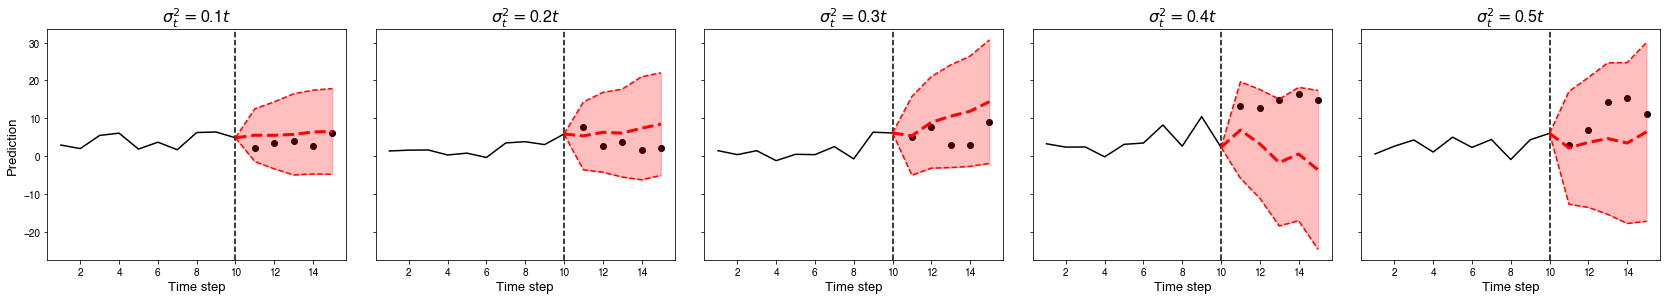

In [35]:
plot_timeseries(noise_mode='time-dependent', baseline='CPRNN', figure_name='time-dependent')

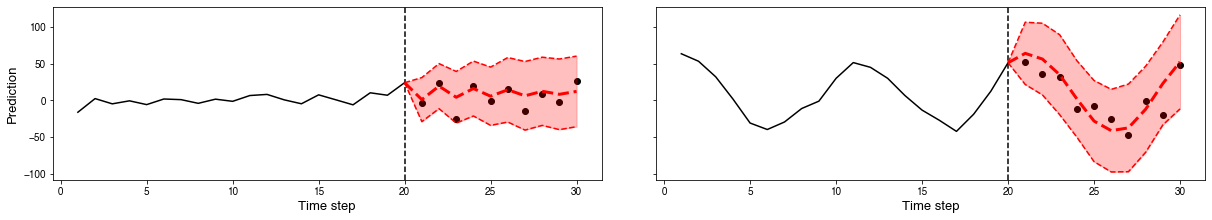

In [36]:
plot_timeseries(noise_mode='periodic', baseline='CPRNN', figsize=(20,3), figure_name='periodic')

## Long horizon analysis (Figure 4)

Training code for the three underlying RNN models:

```python
train_conformal_forecaster(noise_mode='long-horizon', retrain=True, save_model=True, save_results=False, rnn_mode='GRU')
train_conformal_forecaster(noise_mode='long-horizon', retrain=True, save_model=True, save_results=False, rnn_mode='RNN')
train_conformal_forecaster(noise_mode='long-horizon', retrain=True, save_model=True, save_results=False, rnn_mode='LSTM')
```

Analyzing interval widths:

In [75]:
widths = {}
for rnn_model in ['LSTM', 'RNN', 'GRU']:
    model = torch.load('saved_models/long-horizon_CPRNN_{}_100.pt'.format(rnn_model))
    
    ws = []
    alphas = np.arange(100) * 0.01
    for alpha in alphas:
        corrected_alpha = alpha / model.horizon
        corrected_critical_calibration_scores = torch.tensor([[
                torch.quantile(
                    position_calibration_scores,
                    q=1 - corrected_alpha * model.n_train / (model.n_train + 1))
                for position_calibration_scores in feature_calibration_scores]
                for feature_calibration_scores in model.calibration_scores]).T
        ws.append(corrected_critical_calibration_scores.flatten().tolist())
    ws = np.array(ws)
    ws = ws * 2
    widths[rnn_model] = ws

In [118]:
def compute_valid_horizons(threshold_width=15):
    valid_horizons = {}
    for rnn_model in ['LSTM', 'RNN', 'GRU']:    
        T = []
        ws = widths[rnn_model]
        for i, _ in enumerate(alphas):
            t = 0
            while t < ws.shape[1] and ws[i, t] < threshold_width:
                t += 1
            T.append(t)
        valid_horizons[rnn_model] = np.array(T)
    return valid_horizons

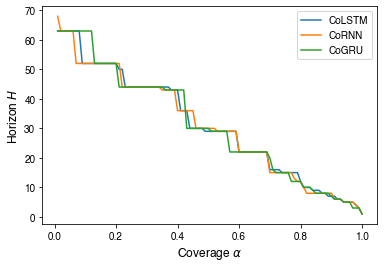

In [132]:
for threshold_width in [16]:
    valid_horizons = compute_valid_horizons(threshold_width)
    for rnn_model in valid_horizons.keys():
        plt.plot(1-alphas, valid_horizons[rnn_model], label='Co{}'.format(rnn_model))
plt.xlabel('Coverage $\\alpha$')
plt.ylabel('Horizon $H$')
plt.legend()
plt.savefig('{}.png'.format('tradeoff') , bbox_inches='tight', dpi=1000)
plt.show()

## BJRNN baseline

Example for training the time-dependent noise profile, for a single seed.

In [ ]:
from utils.train_synthetic import train_bjrnn
results = train_bjrnn(noise_mode='time-dependent')